In [54]:
!pip install git+https://github.com/keras-team/keras-tuner.git@1.0.3
!pip install autokeras 


  Cloning https://github.com/keras-team/keras-tuner.git (to revision 1.0.3) to /tmp/pip-req-build-d390zsov
  Running command git clone -q https://github.com/keras-team/keras-tuner.git /tmp/pip-req-build-d390zsov
  Running command git checkout -q e07ab2240233dca58794b11dfca3de1b99c91d13


In [55]:
import pandas as pd
import numpy as np
import tensorflow as tf
import autokeras as ak
from autokeras import StructuredDataClassifier
from autokeras import StructuredDataRegressor
from sklearn.model_selection import train_test_split

In [56]:
dataset=pd.read_csv('n=2_class_number_1vs2.csv')


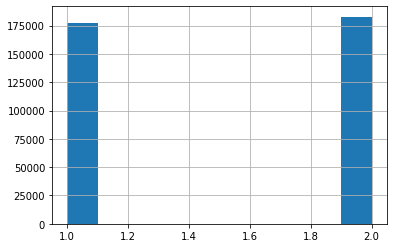

In [57]:
from sklearn.preprocessing import minmax_scale
 
#dataset_scaled = minmax_scale(dataset[['class_number']], feature_range=(0,1))
 
#dataset['class_number']=dataset_scaled[:,0]
dataset['class_number'].hist()

In [64]:
primes_up_to_1000=[1,2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421, 431, 433, 439, 443, 449, 457, 461, 463, 467, 479, 487, 491, 499, 503, 509, 521, 523, 541, 547, 557, 563, 569, 571, 577, 587, 593, 599, 601, 607, 613, 617, 619, 631, 641, 643, 647, 653, 659, 661, 673, 677, 683, 691, 701, 709, 719, 727, 733, 739, 743, 751, 757, 761, 769, 773, 787, 797, 809, 811, 821, 823, 827, 829, 839, 853, 857, 859, 863, 877, 881, 883, 887, 907, 911, 919, 929, 937, 941, 947, 953, 967, 971, 977, 983, 991, 997]
col_train=[]
for i in primes_up_to_1000:
  col_train.append(i+12)
x=dataset.iloc[:,col_train].values
y=dataset.iloc[:,3].values
print(x,y)




[[1 0 1 ... 0 2 2]
 [1 1 0 ... 0 0 2]
 [1 0 0 ... 0 2 0]
 ...
 [1 0 2 ... 0 0 0]
 [1 0 2 ... 0 2 0]
 [1 2 0 ... 0 0 2]] [1 1 1 ... 1 1 1]


In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.7, random_state = 1)


In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #can also use MinMaxScaler
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
#x_train = x_train.reshape(-1, 1)
#x_train=sc.fit_transform(x_train)
#x_test = x_test.reshape(-1, 1)
#x_test = sc.transform(x_test)

In [70]:
searched_model = ak.StructuredDataClassifier(max_trials = 30,overwrite=True)

In [71]:
searched_model.fit(x=x_train, y=y_train,epochs=10, batch_size=16)

Trial 30 Complete [00h 14m 07s]
val_accuracy: 0.6457870602607727

Best val_accuracy So Far: 0.8472222089767456
Total elapsed time: 05h 47m 38s
INFO:tensorflow:Oracle triggered exit
Epoch 1/10
6750/6750 [==============================] - 77s 11ms/step - loss: 0.5858 - accuracy: 0.6693
Epoch 2/10
6750/6750 [==============================] - 75s 11ms/step - loss: 0.4874 - accuracy: 0.7470
Epoch 3/10
6750/6750 [==============================] - 74s 11ms/step - loss: 0.4213 - accuracy: 0.7920
Epoch 4/10
6750/6750 [==============================] - 74s 11ms/step - loss: 0.3510 - accuracy: 0.8379
Epoch 5/10
6750/6750 [==============================] - 75s 11ms/step - loss: 0.2804 - accuracy: 0.8792
Epoch 6/10
6750/6750 [==============================] - 75s 11ms/step - loss: 0.2133 - accuracy: 0.9144
Epoch 7/10
6750/6750 [==============================] - 75s 11ms/step - loss: 0.1550 - accuracy: 0.9415
Epoch 8/10
6750/6750 [==============================] - 76s 11ms/step - loss: 0.1068 - accu

In [72]:
#Evaluate the classifier on test data
_, acc = searched_model.evaluate(x_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

7875/7875 [==============================] - 74s 9ms/step - loss: 0.6632 - accuracy: 0.8645
Accuracy =  86.45198345184326 %


In [ ]:
# Predicting the Test set results
y_pred = searched_model.predict(x_test)
y_pred = (y_pred > 0.5)

7875/7875 [==============================] - 11s 1ms/step


TypeError: ignored

In [ ]:
# Making the Confusion Matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)
accuracy_score(y_test, y_pred)


ValueError: ignored

In [73]:
# get the final best performing model
model = searched_model.export_model()
print(model.summary())
model.get_config()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 169)]             0         
_________________________________________________________________
multi_category_encoding (Mul (None, 169)               0         
_________________________________________________________________
normalization (Normalization (None, 169)               339       
_________________________________________________________________
dense (Dense)                (None, 1024)              174080    
_________________________________________________________________
re_lu (ReLU)                 (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
re_lu_1 (ReLU)               (None, 1024)              0     

{'input_layers': [['input_1', 0, 0]],
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 169),
    'dtype': 'float64',
    'name': 'input_1',
    'ragged': False,
    'sparse': False},
   'inbound_nodes': [],
   'name': 'input_1'},
  {'class_name': 'Custom>MultiCategoryEncoding',
   'config': {'dtype': 'float32',
    'encoding': ListWrapper(['int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', 'int', '

In [ ]:
#try:
#    model.save("best_model_autokeras_ANN_class_number0.1", save_format="tf")
#except Exception:
#    model.save("best_model_autokeras_ANN_class_number0.1.h5")

In [ ]:
#newmodel=tf.keras.models.load_model('best_model_autokeras_ANN_class_number0.1')

In [ ]:
#newmodel.summary()